In [6]:
#import pandas for dataframes, import csv, import os for file handling
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #suppress futurewarnings from matplotlib
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import pandas as pd
from pandas import read_csv
import math
from scipy import stats as st
import csv
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from xgboost import XGBClassifier

global df
csv_name = 'pipeline_outputs_SAY_10-15-2021.csv' #INPUT csv name here
df = pd.read_csv(csv_name) #import csv
df_data = pd.read_csv("data.csv") #second data sheet

df_data.drop(['BMI','Sex'], axis=1,inplace =True)
df = df.merge(df_data, on="subject_id", how = 'left')
for col in df.columns:
    if (('GlobalEfficiency' in col) or ('MaximizedModularity' in col) 
        or ('MeanClusteringCoeff' in col) or ('MeanTotalStrength'in col)
        or ('NetworkCharacteristic' in col) or ('TotalStrength' in col)
        or ('dummyrest' in col) or ('session_id' in col) or ('subject_id' in col)
        or ('dummy_rest' in col) or ('file_name' in col) or ('1back' in col)
        or ('acq_id' in col) or ('anatomical_zstat1' in col) or ('datetime' in col)):
        del df[col]

df['Sex'].replace(['Female','Male'],[0,1],inplace=True)

for col in df.columns:
    if(df[col].isnull().values.any()):
        if(df[col].isnull().sum()>34):
            del(df[col])
    
    
            
df=df.dropna()
df = df._get_numeric_data()

list_outliers = {} #global list of outliers for later use

study_name = "SAY" #INPUT study name
date = "10/15/2021" #INPUT date updated (mm/dd/yyyy)

FileNotFoundError: [Errno 2] No such file or directory: 'pipeline_outputs_SAY_10-15-2021.csv'

In [2]:
# X = df.iloc[:,0:df.columns.size].values
# Y = df['fft_stair_us_tester1'].values

#https://towardsdatascience.com/3-essential-ways-to-calculate-feature-importance-in-python-2f9149592155
#preprocess data, X and Y train/test split, scale x values 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('fft_stair_ds_tester1', axis=1)
X2 = df.drop(['fft_stair_ds_tester1','Sex'], axis=1) #no sex
y = df['fft_stair_ds_tester1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

ss2 = StandardScaler()
X2_train_scaled = ss2.fit_transform(X2_train)
X2_test_scaled = ss2.transform(X2_test)

C:\Users\Nishant Bhamidipati\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:19:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                              Attribute  Importance
153                    relMeanRMSMotion    0.031694
77                           gsr_y_rest    0.027489
162                             rpve_wm    0.026925
84                               max_fd    0.023575
48                       dvars_std_rest    0.019613
183                    t1_dice_distance    0.015112
196                 tpm_overlap_csf_t1w    0.012337
7             MeanStrengthaal116despike    0.011879
20                               RefAmp    0.011621
166                              snr_gm    0.011556
9               MeanStrengthaal116scrub    0.011455
15          MeanStrengthpower264despike    0.010852
134          

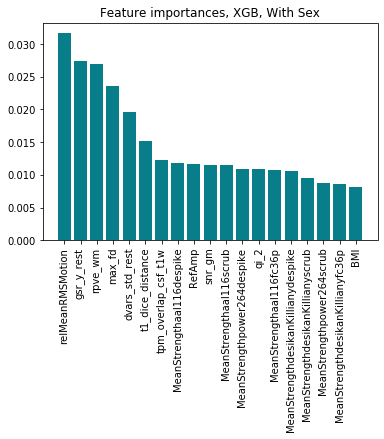

In [3]:
#feature selection using XGB classifier ------ SEX included
model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances.drop(importances.loc[importances['Importance']<0.007].index, inplace=True)
print(importances)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances, XGB, With Sex')
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Nishant Bhamidipati\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:20:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                              Attribute  Importance
152                    relMeanRMSMotion    0.031694
76                           gsr_y_rest    0.027489
161                             rpve_wm    0.026925
83                               max_fd    0.023575
47                       dvars_std_rest    0.019613
182                    t1_dice_distance    0.015112
195                 tpm_overlap_csf_t1w    0.012337
6             MeanStrengthaal116despike    0.011879
19                               RefAmp    0.011621
165                              snr_gm    0.011556
8               MeanStrengthaal116scrub    0.011455
14          MeanStrengthpower264despike    0.010852
133          

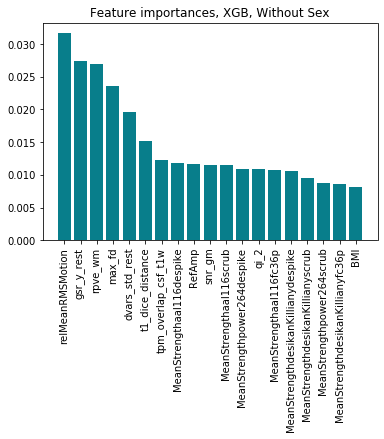

In [4]:
#feature selection using XGB classifier ------ SEX NOT included

model = XGBClassifier()
model.fit(X2_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X2_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances.drop(importances.loc[importances['Importance']<0.007].index, inplace=True)
print(importances)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances, XGB, Without Sex')
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Nishant Bhamidipati\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\Nishant Bhamidipati\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Nishant Bhamidipati\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


dvars_nstd_rest: 27.70570081579798
estimatedLostTemporalDOFaroma: 13.463283463808345
estimatedLostTemporalDOFfc36pscrub: 19.69638535595964
fd_mean_rest: 13.356490892453467
fd_num_rest: 11.006589003826916
fd_perc_rest: 10.938664650006032
nNuisanceParametersaroma: 13.463283463808345
nSpikesFDfc36pscrub: 19.32389991662744
nVolCensoredfc36pscrub: 19.503142594406174
pctSpikesFDfc36pscrub: 19.32389991971171
relMaxRMSMotion: 12.548513144283733
relMaxRMSMotionaroma: 12.548513144283733
relMaxRMSMotionfc36pdespike: 12.548513144283733
relMaxRMSMotionfc36pscrub: 12.548513144283733
relMeanRMSMotion: 16.527861126743584
relMeanRMSMotionaroma: 16.527861126743584
relMeanRMSMotionfc36pdespike: 16.527861126743584
relMeanRMSMotionfc36pscrub: 16.527861126743584
peakvo2_ml_gxt: 14.070035808341949
fft_4step_t1: 11.585328987036307
fft_4step_t2: 10.722206596190558
fft_stair_ds_tester1: 79.12261650265755


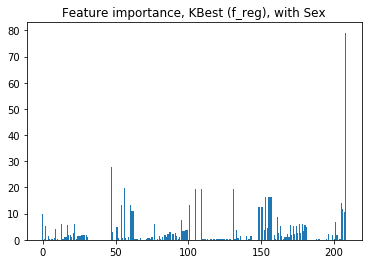

In [5]:
#https://machinelearningmastery.com/feature-selection-for-regression-data/
#feature selection using SelectKBest, f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

def select_features1(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train_fs, X_test_fs, fs = select_features1(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
    if(fs.scores_[i]>10):
        print(df.columns[i]+": "+ str(fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title('Feature importance, KBest (f_reg), with Sex')
plt.show()

C:\Users\Nishant Bhamidipati\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\Nishant Bhamidipati\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Nishant Bhamidipati\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


coregJaccardnback: 27.70570081579798
estimatedLostTemporalDOF: 13.463283463808345
estimatedLostTemporalDOFfc36pdespike: 19.69638535595964
fber_t1w: 13.356490892453467
fd_mean_rest: 11.006589003826916
fd_num_rest: 10.938664650006032
nNuisanceParameters: 13.463283463808345
nSpikesDVfc36pscrub: 19.32389991662744
nVolCensoredfc36pdespike: 19.503142594406174
pctSpikesDVfc36pscrub: 19.32389991971171
raw_voxel_size_z: 12.548513144283733
relMaxRMSMotion: 12.548513144283733
relMaxRMSMotionaroma: 12.548513144283733
relMaxRMSMotionfc36pdespike: 12.548513144283733
relMaxRMSMotionnback: 16.527861126743584
relMeanRMSMotion.1: 16.527861126743584
relMeanRMSMotionaroma: 16.527861126743584
relMeanRMSMotionfc36pdespike: 16.527861126743584
Age_y: 14.070035808341949
peakvo2_ml_gxt: 11.585328987036307
fft_4step_t1: 10.722206596190558
fft_4step_t2: 79.12261650265755


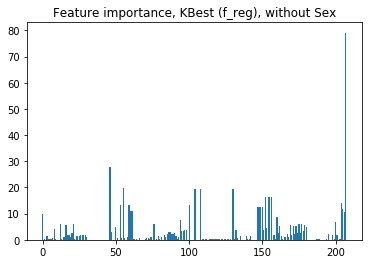

In [6]:
#https://machinelearningmastery.com/feature-selection-for-regression-data/
#feature selection using SelectKBest, f_regression, sex Not Included
def select_features2(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train_fsNoSex, X_test_fsNoSex, fsNoSex = select_features2(X2_train, y_train, X2_test)
for i in range(len(fsNoSex.scores_)):
    if(fsNoSex.scores_[i]>10):
        print(df.columns[i]+": "+ str(fsNoSex.scores_[i]))
plt.bar([i for i in range(len(fsNoSex.scores_))], fsNoSex.scores_)
plt.title('Feature importance, KBest (f_reg), without Sex')
plt.show()

BMI: 0.21464805324597958
MeanStrengthdesikanKillianyaroma: 0.217462282439298
MeanStrengthdesikanKillianyscrub: 0.2134040852891168
MeanStrengthpower264scrub: 0.2008471254416404
dvars_nstd_rest: 0.20117823714574223
estimatedLostTemporalDOFfc36pscrub: 0.30281316156650684
motionDVCorrFinalfc36pscrub: 0.20264341173313305
nSpikesFDfc36pscrub: 0.2994701818338128
nVolCensoredfc36pscrub: 0.25671470663914997
pctSpikesFDfc36pscrub: 0.304852481655451
relMeanRMSMotion: 0.208833012927081
relMeanRMSMotionaroma: 0.208833012927081
relMeanRMSMotionfc36pdespike: 0.208833012927081
relMeanRMSMotionfc36pscrub: 0.208833012927081
fft_stair_ds_tester1: 0.29271070486965245


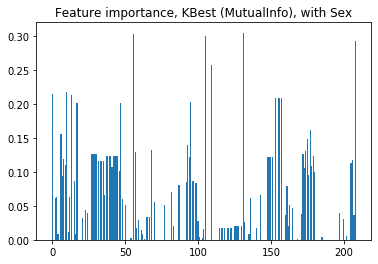

In [7]:
#https://machinelearningmastery.com/feature-selection-for-regression-data/
#feature selection using SelectKBest, mutual_info_regression
from sklearn.feature_selection import mutual_info_regression

def select_features3(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train_fs2, X_test_fs2, fs2 = select_features3(X_train, y_train, X_test)
for i in range(len(fs2.scores_)):
    if(fs2.scores_[i]>.175):
        print(df.columns[i]+": "+ str(fs2.scores_[i]))
plt.bar([i for i in range(len(fs2.scores_))], fs2.scores_)
plt.title('Feature importance, KBest (MutualInfo), with Sex')
plt.show()

BMI: 0.21587354344205822
MeanStrengthaal116scrub: 0.217462282439298
MeanStrengthdesikanKillianyfc36p: 0.20576519640022806
MeanStrengthpower264fc36p: 0.19529156988608443
coregJaccardnback: 0.19888214509781177
estimatedLostTemporalDOFfc36pdespike: 0.2981414443947896
motionDVCorrFinalfc36pdespike: 0.1950045228442443
nSpikesDVfc36pscrub: 0.30905921242468226
nVolCensoredfc36pdespike: 0.250567295022988
pctSpikesDVfc36pscrub: 0.30681971887085036
relMaxRMSMotionnback: 0.20709690181596985
relMeanRMSMotion.1: 0.20709690181596985
relMeanRMSMotionaroma: 0.20709690181596985
relMeanRMSMotionfc36pdespike: 0.20709690181596985
fft_4step_t2: 0.29635349239401876


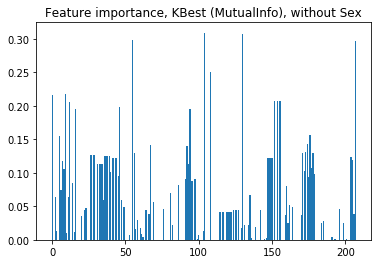

In [8]:
#https://machinelearningmastery.com/feature-selection-for-regression-data/
#feature selection using SelectKBest, mutual_info_regression, Sex Not Included
from sklearn.feature_selection import mutual_info_regression

def select_features4(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train_fs2NoSex, X_test_fs2NoSex, fs2NoSex = select_features4(X2_train, y_train, X2_test)
for i in range(len(fs2NoSex.scores_)):
    if(fs2NoSex.scores_[i]>.175):
        print(df.columns[i]+": "+ str(fs2NoSex.scores_[i]))
plt.bar([i for i in range(len(fs2NoSex.scores_))], fs2NoSex.scores_)
plt.title('Feature importance, KBest (MutualInfo), without Sex')
plt.show()

In [9]:
#------------------------------------------------------------------------



In [10]:
#Linear Regression, All features (with Sex)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train,y_train)
result = model.predict(X_test)
mae = mean_absolute_error(y_test, result)
mse = mean_squared_error(y_test, result)
print('Mean Absolute Error:'+str(mae))
print('Mean Squared Error:'+str(mse))

Mean Absolute Error:1.8214998697656961
Mean Squared Error:5.580124403970049


In [11]:
def select(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k=10)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
model = LinearRegression()
model.fit(X_train_fs, y_train)
result1 = model.predict(X_test_fs)
mae1 = mean_absolute_error(y_test, result1)
mse1 = mean_squared_error(y_test, result1)
print('MAE1: %.3f' % mae1)
print('MSE1: %.3f' % mse1)

model = LinearRegression()
model.fit(X_train_fsNoSex, y_train)
result2 = model.predict(X_test_fsNoSex)
mae2 = mean_absolute_error(y_test, result2)
mse2 = mean_squared_error(y_test, result2)
print('MAE2: %.3f' % mae2)
print('MSE2: %.3f' % mse2)

model = LinearRegression()
model.fit(X_train_fs2, y_train)
result3 = model.predict(X_test_fs2)
mae3 = mean_absolute_error(y_test, result3)
mse3 = mean_squared_error(y_test, result3)
print('MAE3: %.3f' % mae3)
print('MSE3: %.3f' % mse3)

model = LinearRegression()
model.fit(X_train_fs2NoSex, y_train)
result4 = model.predict(X_test_fs2NoSex)
mae4 = mean_absolute_error(y_test, result4)
mse4 = mean_squared_error(y_test, result4)
print('MAE4: %.3f' % mae4)
print('MSE4: %.3f' % mse4)



MAE1: 1.821
MSE1: 5.580
MAE2: 2.022
MSE2: 6.745
MAE3: 1.821
MSE3: 5.580
MAE4: 2.022
MSE4: 6.745


In [12]:
structural = ['fwhm','snr','cnr','fber','efc','qi1','qi2','icvs','rpve','inu','summary']
functional = ['efc','fber','fwhm','ghost_x','snr','dvars','gcor','mean_fd','num_fd','perc_fd','outlier','quality']

X_s = df.copy(deep=True)
for col in X_s.columns:
    flag = True
    for item in structural:
        if (item in col):
            flag = False
    if(flag):
        del X_s[col]
        
X_f = df.copy(deep=True)
for col in X_f.columns:
    flag = True
    for item in functional:
        if (item in col):
            flag = False
    if(flag):
        del X_f[col]

y = df['fft_stair_ds_tester1']
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y, test_size=0.2, random_state=42)
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_f, y, test_size=0.2, random_state=42)

ss = StandardScaler()
X_s_train_scaled = ss.fit_transform(X_s_train)
X_s_test_scaled = ss.transform(X_s_test)

ss2 = StandardScaler()
X_f_train_scaled = ss2.fit_transform(X_f_train)
X_f_test_scaled = ss2.transform(X_f_test)

C:\Users\Nishant Bhamidipati\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:20:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
     Attribute  Importance
38     rpve_wm    0.052422
28     icvs_wm    0.043168
47      snr_wm    0.032120
48  snr_wm_t1w    0.030776
21      fwhm_z    0.030522


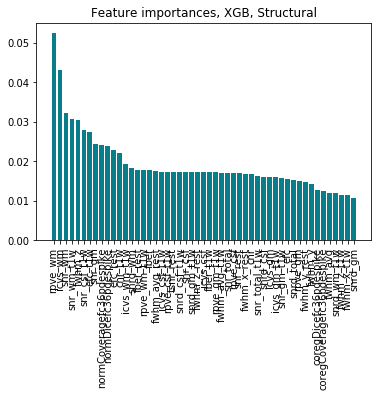

C:\Users\Nishant Bhamidipati\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:20:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
      Attribute  Importance
22       fwhm_z    0.047728
43  snrd_gm_t1w    0.039674
25    gcor_rest    0.034485
9       efc_t1w    0.031411
47  snrd_wm_t1w    0.031312


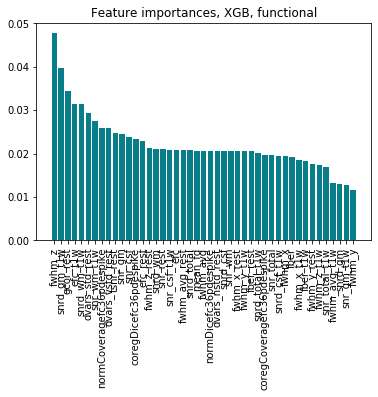

In [13]:
#feature selection using XGB classifier ------ structural and functional
model = XGBClassifier()
model.fit(X_s_train_scaled, y_s_train)
importances_s = pd.DataFrame(data={
    'Attribute': X_s_train.columns,
    'Importance': model.feature_importances_
})
importances_s = importances_s.sort_values(by='Importance', ascending=False)
importances_s.drop(importances_s.loc[importances_s['Importance']<0.01].index, inplace=True)
print(importances_s.head())
plt.bar(x=importances_s['Attribute'], height=importances_s['Importance'], color='#087E8B')
plt.title('Feature importances, XGB, Structural')
plt.xticks(rotation='vertical')
plt.show()

model = XGBClassifier()
model.fit(X_f_train_scaled, y_f_train)
importances_f = pd.DataFrame(data={
    'Attribute': X_f_train.columns,
    'Importance': model.feature_importances_
})
importances_f = importances_f.sort_values(by='Importance', ascending=False)
importances_f.drop(importances_f.loc[importances_f['Importance']<0.01].index, inplace=True)
print(importances_f.head())
plt.bar(x=importances_f['Attribute'], height=importances_f['Importance'], color='#087E8B')
plt.title('Feature importances, XGB, functional')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#https://machinelearningmastery.com/feature-selection-for-regression-data/
#Regression with tuned number of features
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-(X.shape[1]-1), X.shape[1]+1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

C:\Users\Nishant Bhamidipati\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\Nishant Bhamidipati\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.

In [ ]:
#https://machinelearningmastery.com/feature-selection-for-regression-data/
#Regression with tuned number of features NO SEX
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X2.shape[1]-(X2.shape[1]-1), X2.shape[1]+1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X2, y)
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))